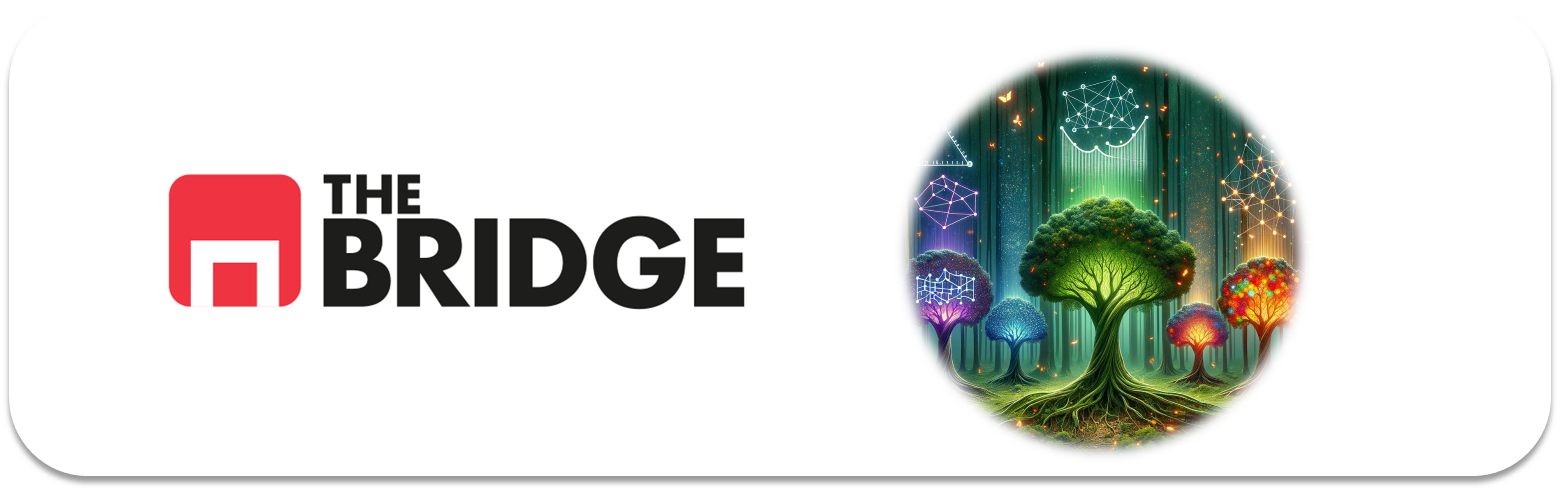

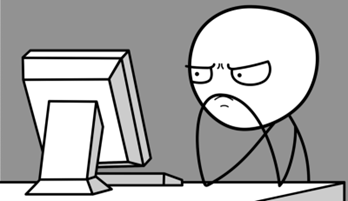

Para ejercitarte y afianzar lo aprendido sobre **Regresion con Árboles de decisión**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

Este conjunto de ejercicios trabajan sobre un dataset de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average



### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

from sklearn.model_selection import train_test_split


### Ejercicio 1

Importa el csv "temps.csv"

In [4]:
df = pd.read_csv("data/temps.csv")
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### Ejercicio 2

Haz un one-hot encoding de las variables categóricas del dataset

In [5]:
df.dtypes

year                int64
month               int64
day                 int64
week               object
temp_2              int64
temp_1              int64
average           float64
actual              int64
forecast_noaa       int64
forecast_acc        int64
forecast_under      int64
friend              int64
dtype: object

In [6]:
df_encoded = pd.get_dummies(df, columns=["week"])
df_encoded.head()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,True,False,False,False,False,False,False
1,2016,1,2,44,45,45.7,44,41,50,44,61,False,False,True,False,False,False,False
2,2016,1,3,45,44,45.8,41,43,46,47,56,False,False,False,True,False,False,False
3,2016,1,4,44,41,45.9,40,44,48,46,53,False,True,False,False,False,False,False
4,2016,1,5,41,40,46.0,44,46,46,46,41,False,False,False,False,False,True,False


### Ejercicio 3

Divide en train y test

In [8]:
X = df_encoded.drop("actual", axis=1)
y = df_encoded["actual"]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,        # 20% de los datos se reservan para test
    random_state=42)       # fijamos semilla para reproducibilidad

### Ejercicio 4

Instancia un DecisionTreeRegressor de sklearn con hiperparámetros por defecto y entrénalo.

In [9]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)


DecisionTreeRegressor()

### Ejercicio 5

Calcula su MAE sin usar sklearn.

In [10]:
y_pred = tree_reg.predict(X_test)
mae = np.mean(np.abs(y_test - y_pred))
print("MAE:", mae)

MAE: 4.628571428571429


### Ejercicio 6

Calcula su MAPE sin usar sklearn

In [11]:
print((y_test == 0).sum()) 
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print("MAPE:", mape, "%")

0
MAPE: 7.18001591449078 %


### Ejercicio 7

Representa el árbol de decision

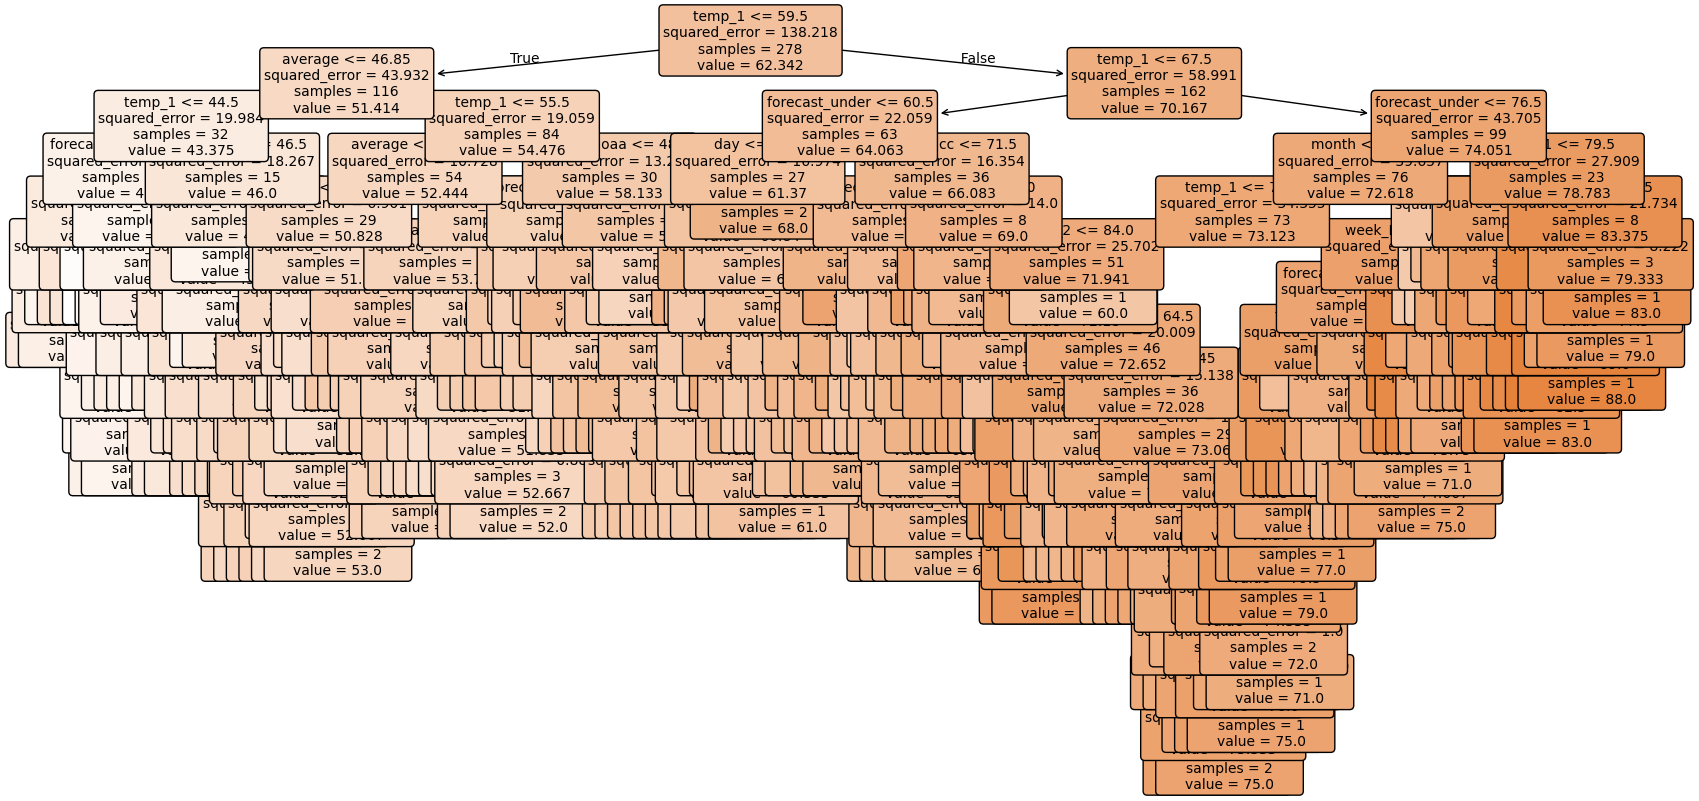

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))  # Tamaño de la figura
plot_tree(tree_reg, 
          feature_names=X.columns,   # Nombres de las columnas originales
          filled=True,               # Colorea los nodos según valor
          rounded=True,              # Bordes redondeados para mejor lectura
          fontsize=10)               # Tamaño de letra
plt.show()

### Ejercicio 8. 

Instancia un nuevo árbol ahora con max_depth a 3 y vuelve a entrenarlo

In [13]:
# Instanciamos el árbol con max_depth=3
tree_reg_depth3 = DecisionTreeRegressor(max_depth=3, random_state=42)

# Entrenamos el árbol con los datos de entrenamiento
tree_reg_depth3.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

### Ejercicio 9

Vuelve a calcular MAE y MAPE

In [14]:

# Predicciones del nuevo modelo sobre el conjunto de test
y_pred_depth3 = tree_reg_depth3.predict(X_test)

# Calcular MAE manualmente
mae_depth3 = np.mean(np.abs(y_test - y_pred_depth3))

# Calcular MAPE manualmente (asegurándonos que no haya ceros en y_test)
mape_depth3 = np.mean(np.abs((y_test - y_pred_depth3) / y_test)) * 100

print("MAE (max_depth=3):", mae_depth3)
print("MAPE (max_depth=3):", mape_depth3, "%")

MAE (max_depth=3): 4.5567196265742504
MAPE (max_depth=3): 7.147155657048517 %


### Ejercicio 10

Vuelve a representar su árbol

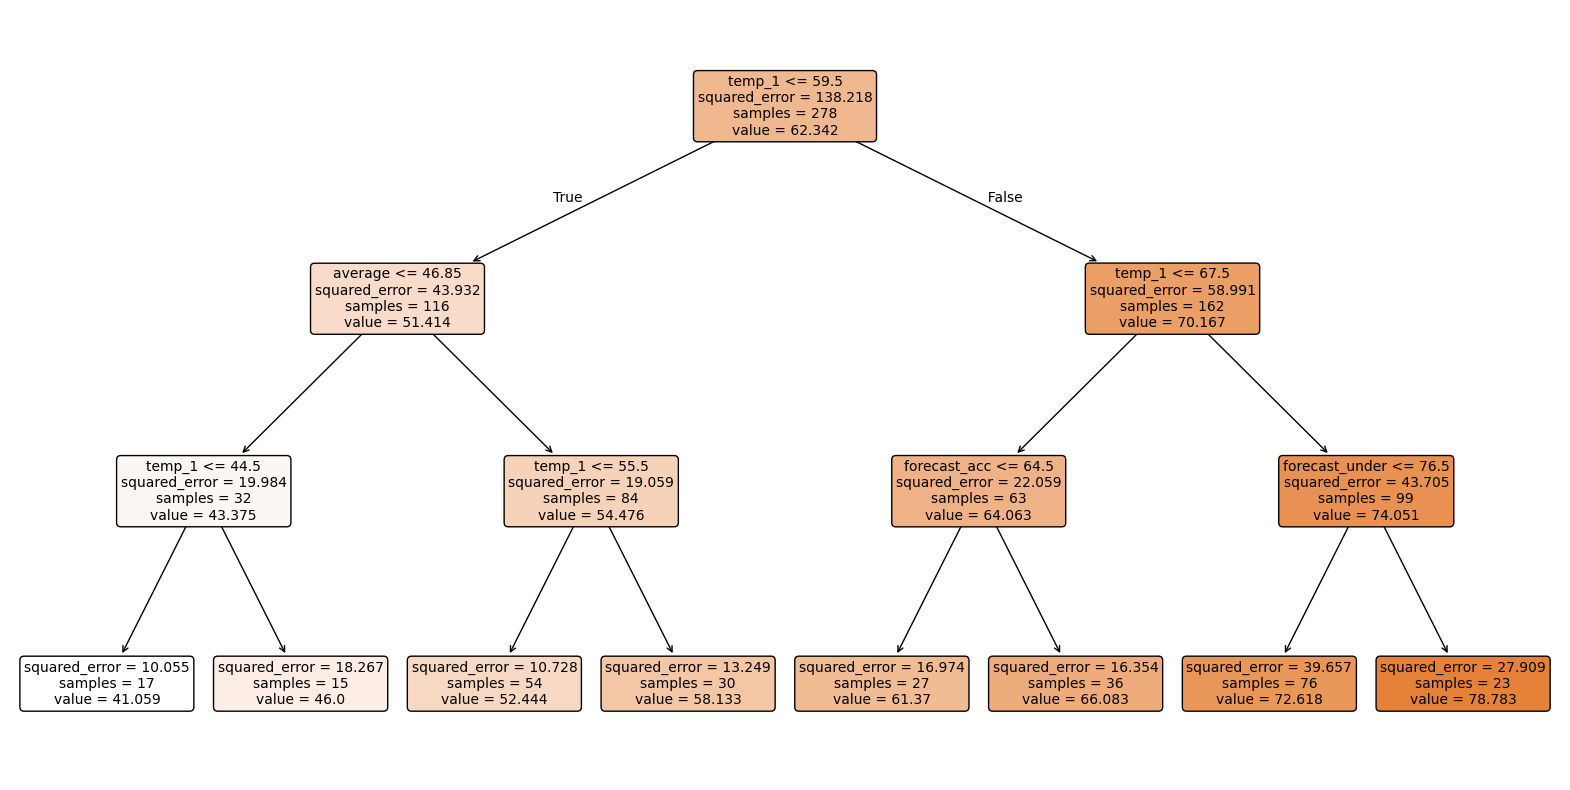

In [15]:
plt.figure(figsize=(20,10))
plot_tree(tree_reg_depth3, 
          feature_names=X.columns, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.show()

### Ejercicio 11

Obten el `feature_importances` de cada variable en el último modelo. Los árboles una vez entrenados tienen un atributo que te lo permite, revisa la documentación si es necesario.

In [16]:
# Obtener las importancias de las variables
importancias = tree_reg_depth3.feature_importances_

# Crear un DataFrame para verlo ordenado y claro
df_importancias = pd.DataFrame({
    'feature': X.columns,
    'importance': importancias
}).sort_values(by='importance', ascending=False)

print(df_importancias)

           feature  importance
4           temp_1    0.880208
5          average    0.088412
8   forecast_under    0.020771
7     forecast_acc    0.010610
0             year    0.000000
3           temp_2    0.000000
2              day    0.000000
1            month    0.000000
6    forecast_noaa    0.000000
9           friend    0.000000
10        week_Fri    0.000000
11        week_Mon    0.000000
12        week_Sat    0.000000
13        week_Sun    0.000000
14      week_Thurs    0.000000
15       week_Tues    0.000000
16        week_Wed    0.000000
